In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] =  [16,9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [ ]:
df = pd.read_csv('Downloads\StudentsPerformance.csv')

In [ ]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
717,female,group C,associate's degree,standard,completed,96,96,99
542,female,group C,associate's degree,standard,none,81,77,79
675,female,group B,some college,standard,completed,50,64,66
297,male,group E,associate's degree,standard,completed,71,74,68
708,male,group D,high school,standard,none,89,87,79
473,female,group D,some high school,standard,none,59,67,61
434,male,group C,some high school,standard,none,73,66,66
574,female,group E,high school,standard,none,74,81,71
280,male,group D,high school,standard,none,53,52,42
253,male,group D,master's degree,standard,none,80,80,72


In [ ]:
bins = [0, 60, 75, 85,100]
gen_reading_df = df[['gender','reading score']].copy()
gen_reading_df['ThangDiem'] = pd.cut(gen_reading_df['reading score'],bins,labels=['D','C','B','A'])
gen_reading_df.sample(10)

,gender,reading score,ThangDiem
29,female,70,C
245,male,76,B
778,female,79,B
792,male,74,C
277,female,63,C
993,female,72,C
351,male,57,D
408,female,57,D
996,male,55,D
499,male,71,C


In [ ]:
def results(p, alpha=0.05):
    cols=['score', 'p_value', 'dof', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [2]:
tanso_df = pd.crosstab(index=gen_reading_df['gender'],columns=gen_reading_df['ThangDiem'])
tanso_df

NameError: ignored

In [ ]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

## So sánh hai biến gender và ThangDiem
- **H0**: Giới tính và điểm reading không phụ thuộc vào nhau
- **H1**: Giới tính và điểm reading có mối liên hệ với nhau.

In [ ]:
p = {}
p['score']= score
p['p_value'] = p_value
p['dof']= dof
results(p)

,score,p_value,dof,KetLuan
,66.422785,2.488690e-14,3,Chấp nhận H1 với mức ý nghĩa 0.05


Về mặt thống kê, giới tính  có ảnh hưởng đến điểm reading ở mức ý nghĩa 5%

In [ ]:
female = gen_reading_df[gen_reading_df['gender']=='female']
male = gen_reading_df[gen_reading_df['gender']=='male']


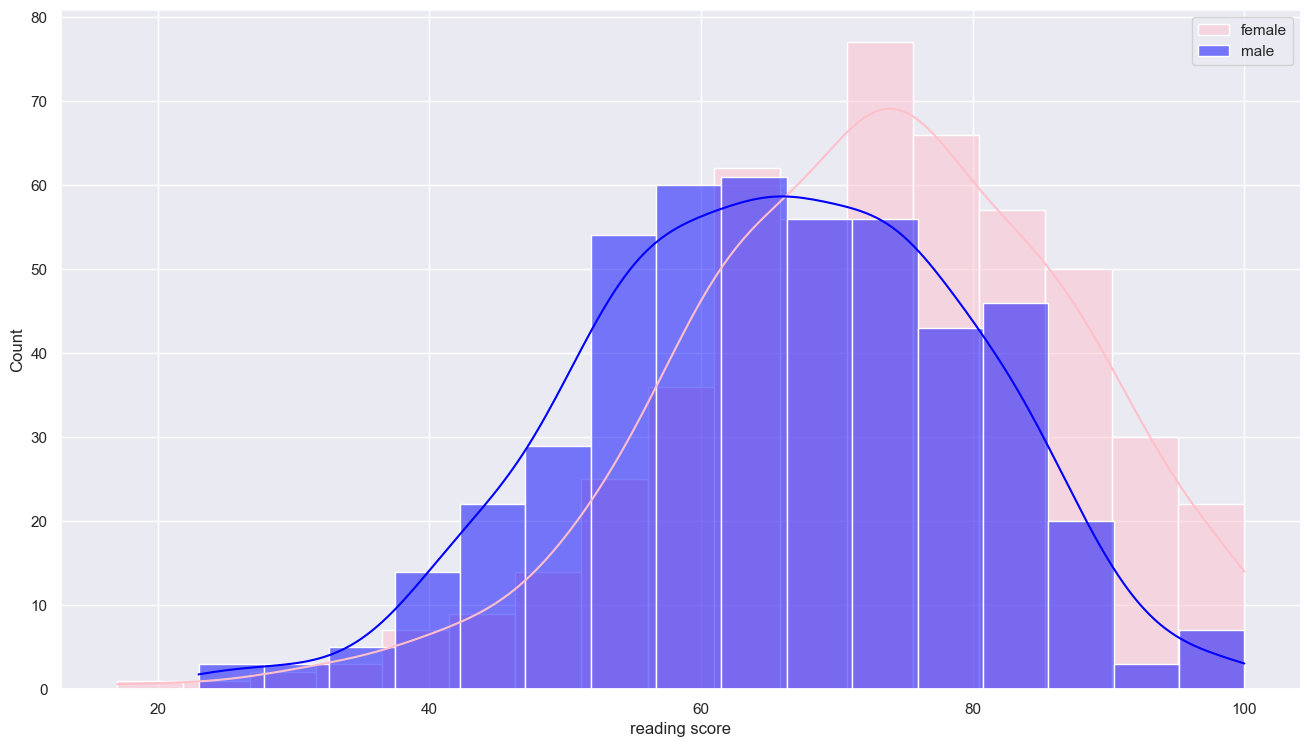

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data=female,x="reading score",color="pink",label="female",kde=True)
sns.histplot(data=male,x="reading score",color="blue",label="male",kde=True)
plt.legend()
plt.show()

In [ ]:
bins = [0, 60, 75, 85,100]
gen_writing_df = df[['gender','writing score']].copy()
gen_writing_df['ThangDiem'] = pd.cut(gen_writing_df['writing score'],bins,labels=['D','C','B','A'])
gen_writing_df.sample(10)

,gender,writing score,ThangDiem
773,female,79,B
835,female,74,C
564,male,46,D
340,male,52,D
800,male,68,C
229,female,94,A
204,male,42,D
750,male,68,C
642,female,79,B
584,female,77,B


In [ ]:
tanso_df = pd.crosstab(index=gen_writing_df['gender'],columns=gen_writing_df['ThangDiem'])
tanso_df

ThangDiem,D,C,B,A
gender,,,,
female,100,187,137,94
male,201,184,70,27


In [ ]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

## So sánh hai biến gender và ThangDiem
- **H0**: Giới tính và điểm writing không phụ thuộc vào nhau
- **H1**: Giới tính và điểm writing có mối liên hệ với nhau.

In [ ]:
p = {}
p['score']= score
p['p_value'] = p_value
p['dof']= dof
results(p)

,score,p_value,dof,KetLuan
,91.522401,1.031660e-19,3,Chấp nhận H1 với mức ý nghĩa 0.05


Về mặt thống kê, giới tính  có ảnh hưởng đến điểm writing ở mức ý nghĩa 5%

In [ ]:
female = gen_writing_df[gen_writing_df['gender']=='female']
male = gen_writing_df[gen_writing_df['gender']=='male']


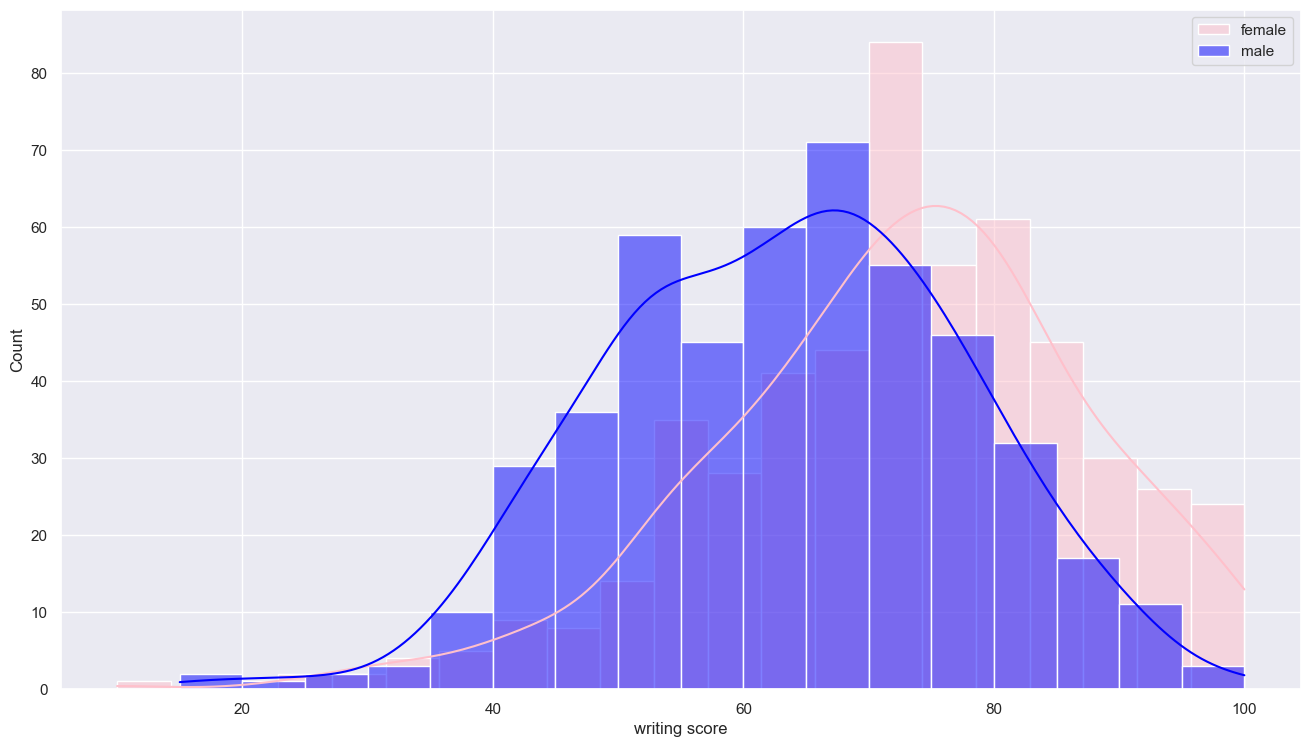

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data=female,x="writing score",color="pink",label="female",kde=True)
sns.histplot(data=male,x="writing score",color="blue",label="male",kde=True)
plt.legend()
plt.show()

In [ ]:
bins = [0, 60, 75, 85,100]
lun_math_df = df[['lunch','math score']].copy()
lun_math_df['ThangDiem'] = pd.cut(lun_math_df['math score'],bins,labels=['D','C','B','A'])
lun_math_df.sample(10)

,lunch,math score,ThangDiem
198,free/reduced,45,D
818,free/reduced,60,D
74,standard,49,D
191,standard,76,B
727,standard,68,C
588,standard,54,D
21,free/reduced,65,C
805,free/reduced,75,C
341,standard,61,C
610,free/reduced,69,C


In [ ]:
tanso_df = pd.crosstab(index=lun_math_df['lunch'],columns=lun_math_df['ThangDiem'])
tanso_df

ThangDiem,D,C,B,A
lunch,,,,
free/reduced,181,124,37,12
standard,157,263,134,91


In [ ]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

## So sánh hai biến lunch và ThangDiem
- **H0**: lunch và điểm math không phụ thuộc vào nhau
- **H1**: lunch và điểm math có mối liên hệ với nhau.

In [ ]:
p = {}
p['score']= score
p['p_value'] = p_value
p['dof']= dof
results(p)

,score,p_value,dof,KetLuan
,90.126341,2.057882e-19,3,Chấp nhận H1 với mức ý nghĩa 0.05


Về mặt thống kê, lunch có ảnh hưởng đến điểm môn toán ở mức ý nghĩa 5%

In [ ]:
free_or_reduced = lun_math_df[lun_math_df['lunch']=='free/reduced']
standard = lun_math_df[lun_math_df['lunch']=='standard']


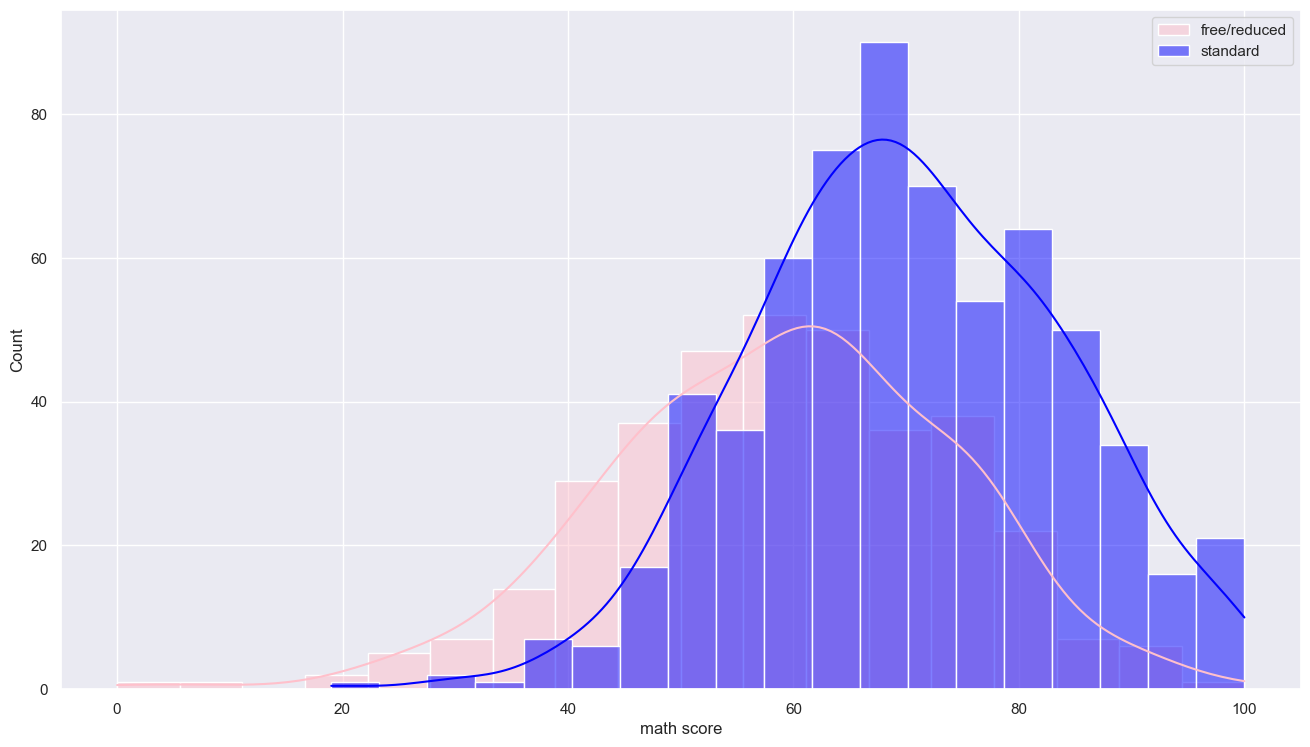

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data=free_or_reduced,x="math score",color="pink",label="free/reduced",kde=True)
sns.histplot(data=standard,x="math score",color="blue",label="standard",kde=True)
plt.legend()
plt.show()

In [ ]:
bins = [0, 60, 75, 85,100]
lun_reading_df = df[['lunch','reading score']].copy()
lun_reading_df['ThangDiem'] = pd.cut(lun_reading_df['reading score'],bins,labels=['D','C','B','A'])
lun_reading_df.sample(10)

,lunch,reading score,ThangDiem
860,standard,62,C
501,standard,87,A
133,standard,81,B
832,standard,60,D
448,standard,46,D
55,free/reduced,41,D
732,standard,89,A
944,standard,68,C
111,standard,55,D
625,standard,97,A


In [ ]:
tanso_df = pd.crosstab(index=lun_reading_df['lunch'],columns=lun_reading_df['ThangDiem'])
tanso_df

ThangDiem,D,C,B,A
lunch,,,,
free/reduced,139,130,56,30
standard,136,251,156,102


In [ ]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

## So sánh hai biến lunch và ThangDiem
- **H0**: lunch và điểm reading không phụ thuộc vào nhau
- **H1**: lunch và điểm reading có mối liên hệ với nhau.

In [ ]:
p = {}
p['score']= score
p['p_value'] = p_value
p['dof']= dof
results(p)

,score,p_value,dof,KetLuan
,44.549719,1.153330e-09,3,Chấp nhận H1 với mức ý nghĩa 0.05


Về mặt thống kê, lunch  có ảnh hưởng đến điểm reading ở mức ý nghĩa 5%

In [ ]:
free_or_reduced = lun_reading_df[lun_reading_df['lunch']=='free/reduced']
standard = lun_reading_df[lun_reading_df['lunch']=='standard']


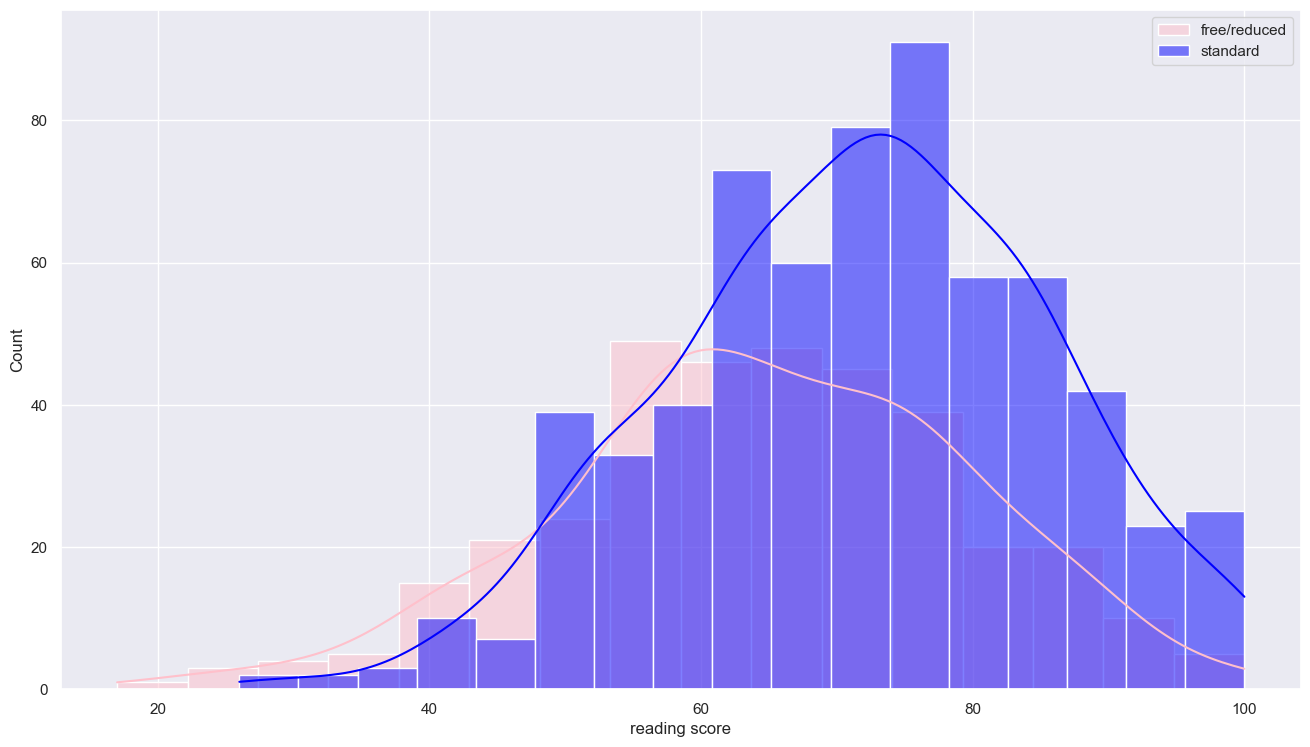

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data=free_or_reduced,x="reading score",color="pink",label="free/reduced",kde=True)
sns.histplot(data=standard,x="reading score",color="blue",label="standard",kde=True)
plt.legend()
plt.show()

In [ ]:
bins = [0, 60, 75, 85,100]
lun_writing_df = df[['lunch','writing score']].copy()
lun_writing_df['ThangDiem'] = pd.cut(lun_writing_df['writing score'],bins,labels=['D','C','B','A'])
lun_writing_df.sample(10)

,lunch,writing score,ThangDiem
904,free/reduced,84,B
850,standard,67,C
298,free/reduced,50,D
657,standard,61,C
86,free/reduced,88,A
296,standard,43,D
206,standard,62,C
562,standard,92,A
39,free/reduced,57,D
539,standard,86,A


In [ ]:
tanso_df = pd.crosstab(index=lun_writing_df['lunch'],columns=lun_writing_df['ThangDiem'])
tanso_df

ThangDiem,D,C,B,A
lunch,,,,
free/reduced,156,120,56,23
standard,145,251,151,98


In [ ]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

## So sánh hai biến lunch và ThangDiem
- **H0**: lunch và điểm writing không phụ thuộc vào nhau
- **H1**: lunch và điểm writing có mối liên hệ với nhau.

In [ ]:
p = {}
p['score']= score
p['p_value'] = p_value
p['dof']= dof
results(p)

,score,p_value,dof,KetLuan
,57.47865,2.031098e-12,3,Chấp nhận H1 với mức ý nghĩa 0.05


Về mặt thống kê, lunch có ảnh hưởng đến điểm writing ở mức ý nghĩa 5%

In [ ]:
free_or_reduced = lun_writing_df[lun_writing_df['lunch']=='free/reduced']
standard = lun_writing_df[lun_writing_df['lunch']=='standard']


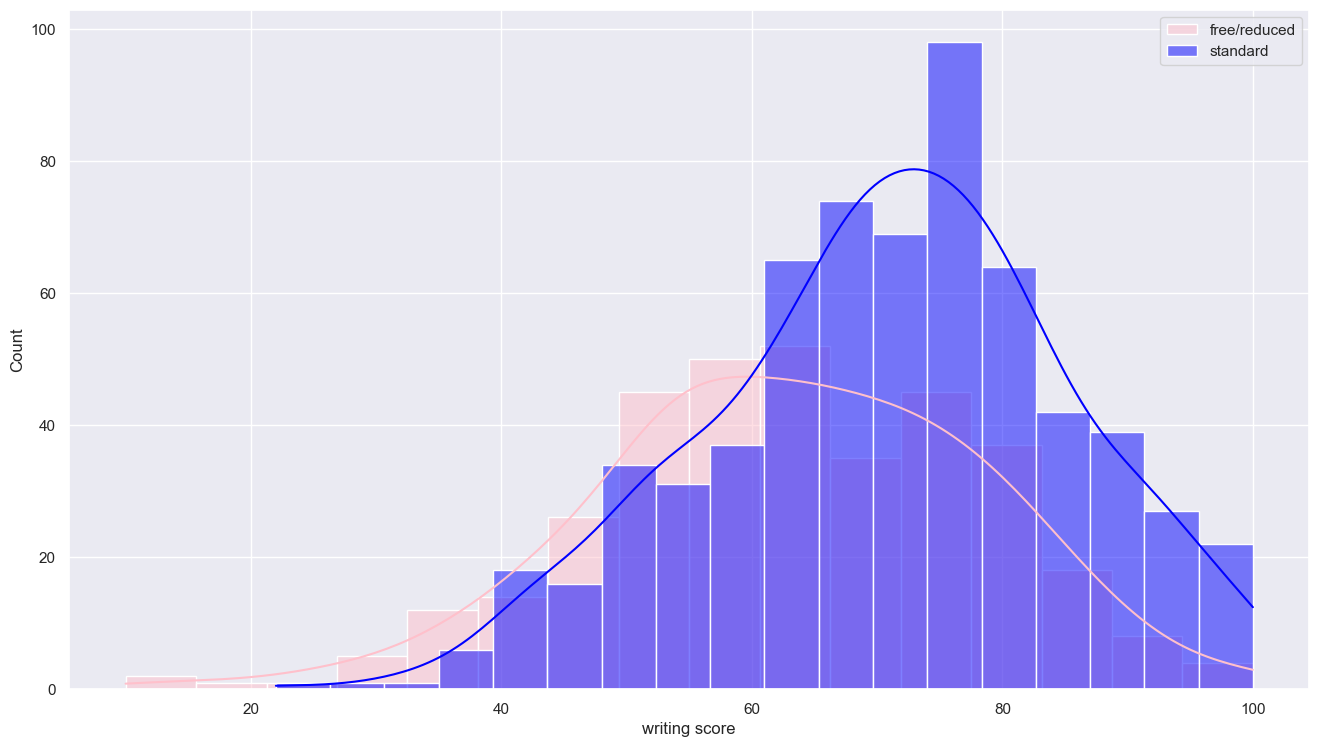

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data=free_or_reduced,x="writing score",color="pink",label="free/reduced",kde=True)
sns.histplot(data=standard,x="writing score",color="blue",label="standard",kde=True)
plt.legend()
plt.show()

## Baitap2

## So sánh mối quan hệ giữa race và chol
- **H0** : Không có mỗi liên hệ giữa race và chol
- **H1** : có mỗi liên hệ giữa race và chol

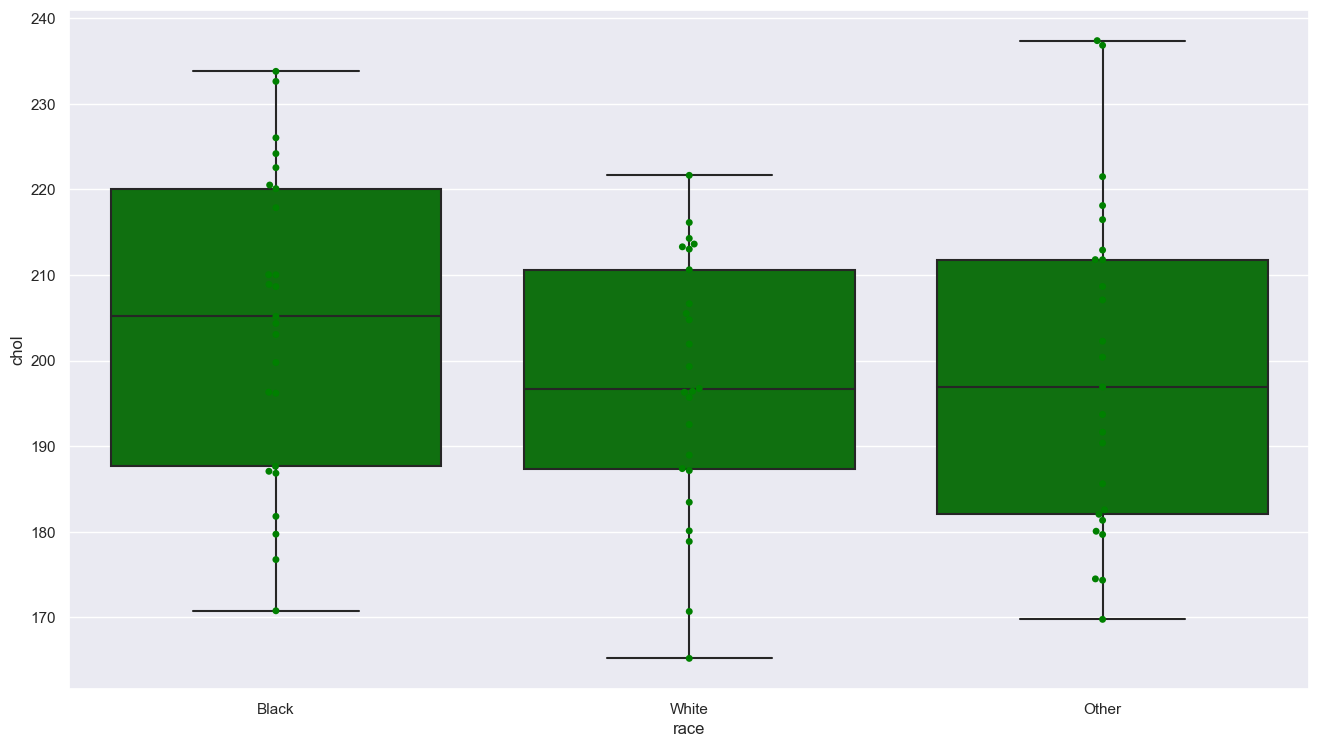

In [ ]:
sns.boxplot(x='race',y='chol',data=cl_df,color='green')
sns.swarmplot(x='race',y='chol',data=cl_df,color='green')
plt.show()

In [ ]:
def results(p,alpha=0.05):
    cols=['f_score','p_value','KetLuan']
    if p['p_value']<alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value']>=alpha:
        p['KetLuan']=f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p,index=[''])
    return df[cols]

In [ ]:
cl_df = pd.io.stata.read_stata('https://www.stata-press.com/data/r17/cholesterol.dta')

In [ ]:
cl_df.sample(10)

,race,agegrp,chol,agemidpt,meangrp
66,Other,60–79,211.786514,70.0,220.615295
3,Black,10–19,176.760956,15.0,179.853088
38,Other,30–39,212.913300,35.0,201.394150
1,Black,10–19,179.729446,15.0,179.853088
42,Other,30–39,185.618561,35.0,201.394150
50,Other,40–59,200.406403,50.0,210.003769
55,Other,40–59,202.265930,50.0,210.003769
34,Other,30–39,193.706329,35.0,201.394150
71,Black,60–79,222.540878,70.0,220.615295
32,Other,30–39,207.087860,35.0,201.394150


In [ ]:
BlackCount = 0
WhiteCount = 0
OtherCount = 0

n = len(cl_df['race'])
for i in range(n) :
    if (cl_df['race'][i] == 'Black'):
        BlackCount +=1
    else:
        if (cl_df['race'][i] == 'White'):
            WhiteCount +=1
        else:
            OtherCount +=1

25

In [ ]:
p={}
p['f_score'], p['p_value'] = stats.f_oneway(CLdf['Black'],df['White'],df['Other'])
results(p)

KeyError: 'Black'